# A. Validación del modelo de regresión lógistica

## A.1. Cargar dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
bank_data = pd.read_csv("../datasets/bank/bank_data.csv")
bank_data.head()

,Unnamed: 0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,...,0,0,1,0,0,0,0,0,1,0
1,1,39,346,4,999,0,1.1,93.994,-36.4,4.855,...,0,0,1,0,0,0,0,0,1,0
2,2,25,227,1,999,0,1.4,94.465,-41.8,4.962,...,0,0,0,0,0,0,1,0,1,0
3,3,38,17,3,999,0,1.4,94.465,-41.8,4.959,...,0,0,1,0,0,0,0,0,1,0
4,4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,...,0,0,0,1,0,0,0,0,1,0


In [18]:
bank_data['y'].sum()

451

In [19]:
bank_data.shape

(4119, 60)

## A.2. Seleccionar las variables a utilizar en el modelo de regresión

In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [4]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

In [5]:
n = 12
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

C:\Users\neosb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\neosb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\neosb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\neosb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [6]:
valcols = np.append(rfe.support_,False)
cols = bank_data.iloc[:,valcols].columns.values.tolist()

In [7]:
X = bank_data[cols]
Y = bank_data["y"]

## A.3. Dividir el conjunto de datos en los conjuntos de "Training" y "Testing"

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

## A.4. Utilizar el conjunto de datos de "Training" para construir el modelo de regresión

In [10]:
from sklearn import linear_model
from IPython.display import display, Math, Latex

In [12]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [15]:
display(Math(r'Y_p=\begin{cases}1& si\ p\leq0.5\\0&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [13]:
probs = lm.predict_proba(X_test)
probs

array([[0.93857871, 0.06142129],
       [0.864772  , 0.135228  ],
       [0.93549095, 0.06450905],
       ...,
       [0.69836607, 0.30163393],
       [0.96892884, 0.03107116],
       [0.55053276, 0.44946724]])

In [14]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Umbrales de Probabilidad

In [20]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [21]:
prob = probs[:,1]
prob_df = pd.DataFrame({"Probability":prob})
threshold = 0.1
prob_df["Prediction"] = np.where(prob_df["Probability"]>threshold, 1, 0)
prob_df.head(10)

,Probability,Prediction
0,0.061421,0
1,0.135228,1
2,0.064509,0
3,0.057720,0
4,0.038740,0
5,0.026446,0
6,0.022332,0
7,0.219235,1
8,0.039925,0
9,0.067084,0


In [22]:
pd.crosstab(prob_df.Prediction, columns="Count")

col_0,Count
Prediction,
0,846
1,390


In [23]:
390/len(prob_df)*100

31.55339805825243

In [24]:
threshold = 0.15
prob_df["Prediction"] = np.where(prob_df["Probability"]>threshold, 1, 0)
pd.crosstab(prob_df.Prediction, columns="Count")

col_0,Count
Prediction,
0,871
1,365


In [25]:
365/len(prob_df)*100

29.53074433656958

In [26]:
threshold = 0.05
prob_df["Prediction"] = np.where(prob_df["Probability"]>threshold, 1, 0)
pd.crosstab(prob_df.Prediction, columns="Count")

col_0,Count
Prediction,
0,467
1,769


In [27]:
769/len(prob_df)*100

62.2168284789644

In [28]:
from sklearn import metrics

In [29]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

# B. Validación cruzada (cross-validation)

In [31]:
from IPython.display import Image

La **validación cruzada** (o **cross-validation**) es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. Esta técnica consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes **particiones** del conjunto de datos.

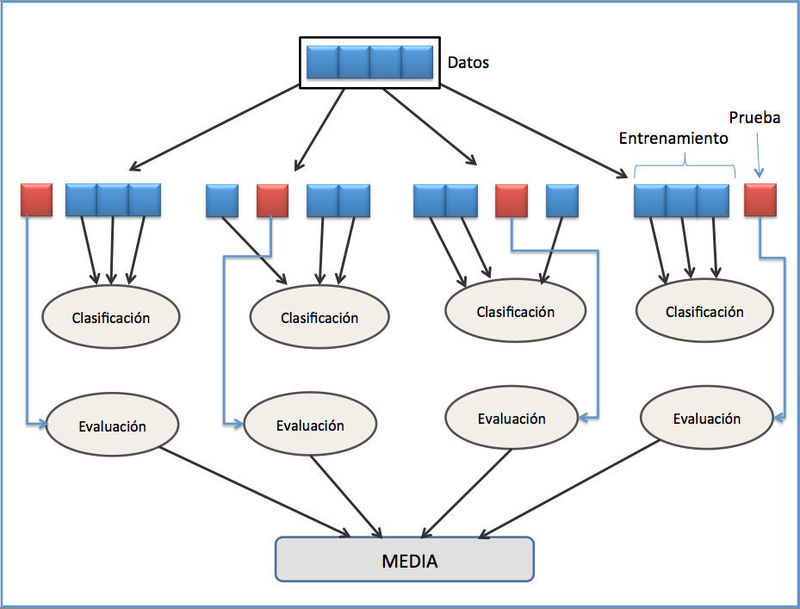

In [32]:
Image(filename="resources/crossvalidation.jpg")

El método de validación cruzada es en si una mejora del **método de retención** (o **holdout method**), el cuál consiste en dividir los datos de muestra en dos conjuntos complementarios (datos de entrenamiento y datos de prueba), utilizando uno de ellos para "entrenar" el modelo de predicción y el otro para validarlo.

Al llevar a cabo la validación de un modelo de predicción mediante el método de rentención, la función de aproximación sólo se ajusta con el conjunto de datos de entrenamiento y a partir de esto se calculan los valores de salida para el conjunto de datos de prueba (valores que no ha analizado antes).

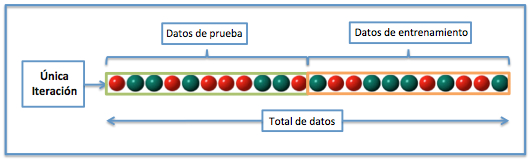

In [33]:
Image(filename="resources/Metodo_de_retención.jpg")

## Motivación detras del uso de la Validación Cruzada

El proceso de ajuste de parámetros de un modelo de predicción se lleva a cabo mediante el análisis de un conjunto de datos de entrenamiento. El objetivo de dicho proceso es optimizar los parámetros del modelo de manera que este se ajuste lo mejor posible a los datos de entrenamiento.

Al "sobreentrenar" un modelo de predicción/aprendizaje con un cierte conjunto de datos, este puede perder la capacidad de generalizar nuevos casos, y por tanto se reduce su capacidad de predicción. Esto se denomina **sobreajuste (overfitting)** y usualmente sucede cuando el tamaño de los datos de entrenamiento es pequeño o cuando el número de parámetros del modelo es grande.

## Tipos de Validación Cruzada

**Validación cruzada de $K$ iteraciones:**
* En la validación cruzada de $K$ iteraciones (o **$K$-fold cross-validation**) los datos de muestra se dividen en $K$ subconjuntos. Uno de los subconjuntos se utiliza como datos de prueba y el resto ($K-1$) como datos de entrenamiento.
* El proceso de validación cruzada es repetido durante $K$ iteraciones con cada uno de los posibles subconjuntos de datos de prueba. 
* Al final del proceso, se calcula la media aritmética de los resultados obtenidos en cada iteración y esto se devuelve como resultado final del proceso.
* En la práctica, la elección del número de iteraciones $K$ depende del número de datos disponibles, aunque lo más común es utilizar la validación cruzada de 10 iteraciones (10-fold cross-validation).
    * **VENTAJAS:** el proceso de validación se lleva a cabo a partir de $K$ subconjuntos de datos de entrenamiento y de prueba (en lugar de solo uno para cada caso),
    * **DESVENTAJAS:** a diferencia del método de retención, es lento desde el punto de vista computacional.

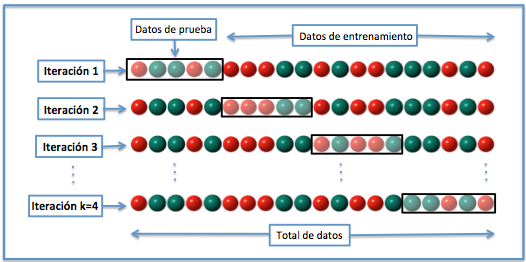

In [34]:
Image(filename="resources/K-fold_cross_validation.jpg")

**Validación cruzada aleatoria:**
* Este método consiste en dividir aleatoriamente el conjunto de datos de entrenamiento y el conjunto de datos de prueba en cada iteración $k$ del proceso.
* En cada iteración, la función de aproximación se ajusta a partir de los datos de entrenamiento y posteriormente se calcula los valores de salida para el conjunto de datos de prueba.
* El resultado final se corresponde a la media aritmética de los valores obtenidos en cada iteración.
    * **VENTAJAS:** la división de datos entrenamiento-prueba no depende del número de iteraciones. 
    * **DESVENTAJAS:** Dada la naturaleza de este método, existe la posibilidad de que algunas muestras quedan sin ser evaluadas, a su vez que otras son evaluadas más de una vez (**solapamiento de los subconjuntos de entrenamiento/prueba**)

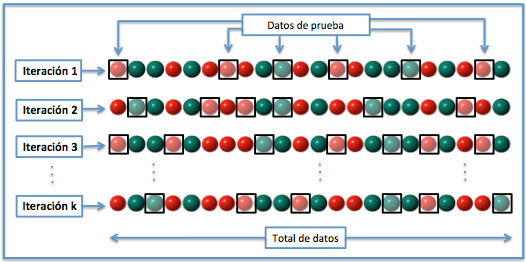

In [35]:
Image(filename="resources/Random_cross_validation.jpg")

**Validación cruzada dejando uno fuera:**
* La validación cruzada dejando uno fuera (o **Leave-one-out cross-validation (LOOCV)**) consta en la separación de los datos de forma que para cada iteración se tenga unicamente una única muestra como datos de prueba, mientras que el resto de los datos se utilizan como datos de entrenamiento.
    * **VENTAJAS:** El error de predicción obtenido al aplicar este tipo de validación es muy pequeño.
    * **DESVENTAJAS:** Este método es muy costoso a nivel computacional, puesto que se tienen que llevar a cabo un elevado número de iteraciones (tantas como el número de muestras $N$ que se tengan), analizando en cada una de estas los datos tanto de entrenamiento como de prueba.

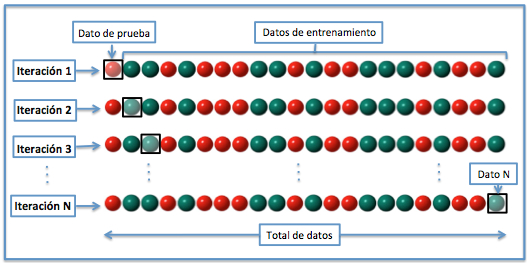

In [36]:
Image(filename="resources/Leave-one-out.jpg")

## Cálculo del Error de Predicción

* El error de predicción en los diferentes tipos de validaciones cruzadas esta dado por la media aritmética de los errores obtenidos en cada iteración del proceso; es decir:

<div align="center">
	<font size=6>
        $E=\frac{1}{K}\sum_{i=1}^K{E_i}$
	<font/>
<div/>

* donde $E_i$ es el error de predicción obtenido en la iteración $i$

## Validación Cruzada mediante el paquete "scikit-learn"

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
lm = linear_model.LogisticRegression()
scores = cross_val_score(lm, X, Y, scoring="accuracy", cv=10)

In [39]:
accuracy = scores
accuracy

array([0.90533981, 0.88834951, 0.90533981, 0.88834951, 0.90048544,
       0.90291262, 0.88349515, 0.89320388, 0.8907767 , 0.89294404])

In [40]:
acc_mean = accuracy.mean()
acc_mean

0.8951196466113908

In [41]:
Errors = 1-scores
Errors

array([0.09466019, 0.11165049, 0.09466019, 0.11165049, 0.09951456,
       0.09708738, 0.11650485, 0.10679612, 0.1092233 , 0.10705596])

In [42]:
E_mean = Errors.mean()
E_mean

0.10488035338860931